In [139]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# OPTIMIZACIÓN

### Problema 2

In [170]:
p=[0,0,0]
f=lambda x: x[0]**2 +x[1]**2+x[2]**2-2*x[2]+1
restri= ({'type': 'eq',"fun":lambda x: 2*x[0]-4*x[1]+5*x[2]-2})
x = sp.optimize.minimize(f,p,constraints=restri)

print('El mínimo de la función es: ', x.fun)
print(1/5)

El mínimo de la función es:  0.19999999998923168
0.2


### Problema 3

a) Dibujo anexado como pdf en la carpeta

In [172]:
x,y,z = sym.symbols('x y z',real=True)

# Caja rectangular -> tres tipos de caras
c1 = x*z
c2 = y*z
c3 = x*y 
area = sym.Eq(c1*2 + c2*2 + c3,12)
print('b) El área es: ')
area

b) El área es: 


Eq(x*y + 2*x*z + 2*y*z, 12)

In [164]:
p = [1,1,1]
f = lambda x: x[0]*x[1]*x[2]*(-1)
restri = ( {'type':'eq','fun': lambda x: x[0]*x[1] + 2*x[1]*x[2] + 2*x[0]*x[2] - 12} )
min =sp.optimize.minimize(f,p,constraints=restri)
min

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.000000340488772
       x: [ 2.000e+00  2.000e+00  1.000e+00]
     nit: 38
     jac: [-2.000e+00 -2.000e+00 -4.000e+00]
    nfev: 190
    njev: 38

In [176]:
vol = min.x[0] * min.x[1] * min.x[2]
print('El volumen máximo que podrá almacenar el usuario en este producto es: ', vol)

El volumen máximo que podrá almacenar el usuario en este producto es:  4.000000340488772


# GENERALIDADES DE PROBABILIDAD

### Problema 4

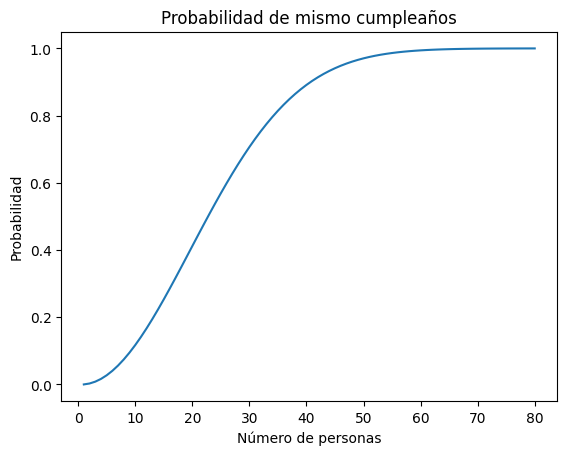

In [142]:
def probabilidad_cumpleaños(n):
    Nprobabilidad = 1
    for i in range(n):
        Nprobabilidad *= (365 - i) / 365
    
    return 1 - Nprobabilidad

n_values = range(1, 81)
probabilidades = []
for i in n_values:
    probabilidades.append(probabilidad_cumpleaños(i))

plt.plot(n_values, probabilidades)
plt.title('Probabilidad de mismo cumpleaños')
plt.xlabel('Número de personas')
plt.ylabel('Probabilidad')
plt.show()

### Problema 8

In [183]:
def GetSample(N = int(1e5), ncoins = 4, Weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [1,-1]
    
    for i in range(N):
        
        if Weights == None:
            Exp = np.random.choice(Events,ncoins)
            
       # print(Exp)
        Sample[i] = Exp
        
    return Sample

N = 100000
Sample = GetSample()
Frecuencias = 0

for i in range(Sample.shape[0]):
    sum = 0
    for j in range(Sample.shape[1]):
        sum += Sample[i,j] 
            
    if sum == 0:
        Frecuencias += 1
prob = Frecuencias/N

print('la probabilidad de obtener dos caras y dos sellos es: ', prob)

la probabilidad de obtener dos caras y dos sellos es:  0.3751


# Distribuciones continuas de probabilidad

In [144]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
rta = (2/3) * (x + 2*y)

probabilidad = sym.integrate(sym.integrate(rta, (x, 0, 1)), (y, 0, 1))
if probabilidad == 1:
    print('La función de densidad conjunta es válida')
else:
    print('La función de densidad conjunta no es válida')

La función de densidad conjunta es válida


In [145]:
g_x = sym.integrate(rta, (y, 0, 1))
h_y = sym.integrate(rta, (x, 0, 1))
print("La distribución marginal g(x) es: ", g_x)
print("La distribución marginal h(y) es: ", h_y)

La distribución marginal g(x) es:  0.666666666666667*x + 0.666666666666667
La distribución marginal h(y) es:  1.33333333333333*y + 0.333333333333333


In [146]:
E_x = sym.integrate(x*g_x, (x, 0, 1))
print(E_x)
print(10/18)

0.555555555555556
0.5555555555555556


In [147]:
E_y = sym.integrate(y*h_y, (y, 0, 1))
print(E_y)
print(11/18)

0.611111111111111
0.6111111111111112


In [148]:
E_x_y = sym.integrate(sym.integrate(x*y*rta, (x, 0, 1)), (y, 0, 1))
covarianza = E_x_y - E_x*E_y
print(covarianza)
print(-0.00617)

-0.00617283950617281
-0.00617


In [149]:
covarianza = sym.integrate(sym.integrate((x-E_x)*(y-E_y)*rta, (x, 0, 1)), (y, 0, 1))
print(covarianza)
print(-0.00617)

-0.00617283950617284
-0.00617


In [152]:
F = sym.simplify(g_x*h_y)
if F == rta:
    print('x y y son independientes')
else:
    print("x y y son dependientes")

x y y son dependientes


# Hidden Markov models

# Mínimos cuadrados

# Parameter estimation